<a href="https://colab.research.google.com/github/guilleto/Introduction-to-Machine-Learning/blob/main/Parcial_1_IAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1.2 
---
Suppose that we use a perceptron to detect spam messages. Lets say that each email message is represented by the frequency of occurrence of keywords, and the output is +1 if the message is considered spam.


---


(a)  Can you think of some keywords that will end up with a large positive weight in the perceptron?


```
  - Sale              - No cost
  - 100%              - Notspam
  - Free              - Bonus
  - Cash              - Claims
  - Gift              - Debt
  - Giveaway          - Fantastic
  - Prize             - Offer
  - Winner            - Unlimited
  - Seleccted         - Beneficiary
```


(b)  How about keywords that will get a negative weight?


```
  - Fired              - Date
  - Meeting            - Hired
  - Invoice            - Response
  - Quotation          - Permission
  - College            - Letter
  - University         - Utilities
  - Announcement       - Contact
  - Request            - Homework
  - Confirmation       - Voucher
```

(c)  What parameter in the perceptron directly affects how many border­ line messages end up being classified as spam?

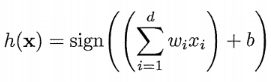

* The parameter "b" because this is the one that regulates the position of the border between -1 and 1.
The weights of each message could not be, since these affect only their respective message, and would not affect the others unless the parameter "b" is changed because of that.


---
---


Exercise 1.3
---
The weight  update  rule in (1.3) has the  nice interpretation  that  it  moves in the direction of classifying x(t) correctly.

(a)  Show that y(t)w^T(t)x(t) < O.  [Hint: x(t) is misclassified by w(t).]

```
Because w(t) missclasified x(t), then we have:

  1.) y(t) = 1
        sign(w^T(t)x(t)) = -1 
          &&
        w^T(t)x(t) < 0 
      Then
        y(t)w^T(t)x(t) < 0

  2.) y(t) = -1
        sign(w^T(t)x(t)) = 1 
          &&
        w^T(t)x(t) > 0
      Then
        y(t)w^T(t)x(t) < 0

In both cases we have that y(t)w^T(t)x(t) < 0
```

(b)  Show that y(t)w^T(t + l)x(t) > y(t)w^T(t)x(t). [Hint: Use (1.3).]

```
 [(1.3) w(t+1) = w(t)+y(t)x(t) ]

If x(t) is misclassified by w(t) 
Then
  y(t)w^T(t)x(t) < 0

So, using the update rule (1.3) we have that...

    y(t)w^T(t)x(t)> 0 < y(t)w^T(t+1)x(t)

Because, in the iteration (t + 1) the classification error occurred in (t) is corrected.
```
(c)  As far as classifying x(t) is concerned, argue that the move from w(t)
to w(t + 1) is a move 'in the right direction'.

* Using the information from the previous point, we can affirm that our boundary moves in the correct direction, since W (t + 1) happens to have a positive value, which indicates that it is classified in a better way (x (t), y (t )).

---
---


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

C1Total = []
CrandomTotal = []
CminTotal = []
NearC1 = []
NearCrandom = []
NearCmin = []
rep = 100000

for i in range(rep):
  TotalCoins = []
  nTrials = 10
  for j in range(1000):
    Coin = []
    toss = np.random.binomial(1,0.5,nTrials)
    Coin.append(toss)
    Coin.append(sum(toss))
    
    TotalCoins.append(Coin) 
  C1 = TotalCoins[0]
  Crandom = TotalCoins[np.random.randint(1000)]
  Cmin = C1
  for x in TotalCoins:
    if x[1] < Cmin[1]:
      Cmin = x
  
  #print("This is the first coin C1 : ", C1)
  #print("This id the random coin Crandom : ", Crandom)
  #print("this is the coin that had the minimum frequency of heads Cmin : ", Cmin)
  C1Total.append(C1[1])
  CrandomTotal.append(Crandom[1])
  CminTotal.append(Cmin[1])
def hoeffding(epsilon, n):
    return 2.0*np.exp(-2.0*n*epsilon**2)

e = np.arange(0.0,0.5,0.05)
#e = 0.00009
bound = hoeffding(e,rep)

C1Total = np.array(C1Total)
CrandomTotal = np.array(CrandomTotal)
CminTotal = np.array(CminTotal)

v1 = np.abs(C1Total-0.5)
vrandom = np.abs(CrandomTotal-0.5)
vmin = np.abs(CminTotal-0.5)
P1, Prand, Pmin = np.zeros(len(e)),np.zeros(len(e)),np.zeros(len(e))

for a in range(e.shape[0]):
    ep = e[a]
    P1[a] = (np.sum(v1 > ep)/rep)
    Prandom[a] = (np.sum(vrandom > ep)/rep)
    Pmin[a] = (np.sum(vrandom > ep)/rep)


#  NearC1.append((v1>e)<= bound ) 
#  NearCrandom.append((vrandom>e)<= bound)
#  NearCmin.append((vmin>e) <= bound) 
#
#C1coute = 0
#Crandomcoute = 0
#Cmincoute = 0
#for q in NearC1:
#    if q == False:
#      C1coute += 1
#for w in NearC1:
#    if w == False:
#      Crandomcoute += 1
#for r in NearC1:
#    if r == False:
#      Cmincoute += 1

#plt.hist(CminTotal, bins='auto',color = "skyblue", ec="skyblue")
#plt.hist(CrandomTotal, bins='auto',color = "Green", ec="Green")
#plt.hist(C1Total, bins='auto',color = "Red", ec="Red")
#plt.title("Histogram of 100.000 times of reproduction")
#plt.show

plt.plot(e, bound, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', label='Hoeffding Bound')
plt.plot(e, P1, marker='|', markerfacecolor='black', markersize=6, color='r', linewidth=1, label='First Coin')
plt.plot(e, Prand, marker='|',markerfacecolor='#008f39', markersize=6, color='g', linewidth=1, linestyle='dashed', label='Random Coin')
plt.plot(e, Pmin, marker='|',markerfacecolor='y', markersize=6, color='y', linewidth=1, linestyle='dashed', label='Coin with Minimum Freq')

print(C1coute)
print(Crandomcoute)
print(Cmincoute)

plt.legend()

Exercise 1.10
---
Here is an experiment that illustrates the difference between a single bin and multiple bins. Run a computer simulation for flipping 1,000 fair coins. Flip
each coin independently 10 times. Let's focus on 3 coins as follows: 
C(1) is the first coin flipped;
C(rand) is a coin you choose at random;
C(min)  is the coin that had the minimum frequency of heads (pick the earlier one in case of a tie).
Let v1, Vrand and Vmin be the fraction of heads you obtain for the respective three coins.


---


(a)  What is µ for the three coins selected ?

```
C1, Crand, Cmin 
V1, Vrand, Vmin
µ1, µrand, µmin

The three selected coins are in the same condition, so we say that the µ for have head is:

  µ1 = µrand = µmin = 0.5
```

(b)  Repeat this entire experiment a large number of times
(e.g., 100,000 runs of the entire experiment) to get several instan ces of V1, Vrand 
and Vmin and plot the histograms of the distributions of V1 , Vrand and Vmin. 
Notice that which coins end up being Crand and Cmin may differ from one run to another.
```
In the code above, the values ​​are assigned as follows:

V1 = C1Total
Vrandom = CrandomTotal
Vmin = CminTotal

and when executing it, the histograms of each one of them are displayed
(the execution takes several minutes (15 min approx))
```
(c)  Using (b), plot estimates for P[|v-µ|>e] as a function of e, together with the 
Hoeffding bound 2e^(-2e^2 N)(On the same Graph).
```
"See code executed above"
```
(d} Which coins obey the Hoeffding bound, and which on es do not? Explain why.

* C1 & Crandom, obey yo the Hoeffding bound.

  that because we select coins without any specific value and follow the naturalness of the experiment

  On the other hand, in Cmin we always choose an exact value, among all the samples, and this corrupts the sample value that should be given. 

(e) Relate part (d) to the multiple bins in Figure 1.10.


* We can represent the previous point with figure (1.10).

  Since, as shown, N hypotheses are created based on the results given for each Ein. some hypothesis amont the N, will show an Ein whose expression would be quite different from Eout creating a really useless bound to find the answer we are looking for.
  As in the previous case, the results of the Cmin coin would be, since this hypothesis was fixed in the tosses with less heads

---
---


Exercise 1.11
---
We are given a data set D of 25 training examples from an unknown target
function f : X → Y, where X = R and Y = {-1,+1}. To learn f , we use a simple hypothesis
set H = {h1, h2} where h1 is the constant +1 function and h2 is the constant -1.

We consider two learning algorithms, S(smart) and C(crazy).
S chooses the hypothesis that agrees the most with D and C chooses the other hypothesis
deliberately. Let us see how these algorithms perform out of sample from the deterministic
and probabilistic points of view. Assume in the probabilistic view that there is a 
probability distribution on X , and let P[f (x) = +1] =p.


---


(a)  Can S produce a hypothesis that is guaranteed to perform better than random on 
any point outside D?


* No, only in the case that S produces based on Din, the ideal hypothesis for all D. and in that case always be executed better or the same as the hypothesis produced by C.


(b)  Assume for the rest of the exercise that all the examples in D have Yn = +1.
Is it possible that the hypothesis that C produces turns out to be better than the
hypothesis that S produces?

* Yes, it is possible, since S only contemplates Din = +1, and in the event that some Dout = -1 occurs, the efficiency of that hypothesis produced by S would always decrease. However, C will contemplate for his hypothesis both +1 and -1 with equal probability, so a hypothesis can be created that in the case that there is some -1 in Dout, its execution would be better than S


(c)  If p = 0.9, what is the probability that S will  produce a better hypothesis than C?

```
P[f(x) = +1] = 0.9 , P[f(x) = -1] = 0.1

P[Sh = +1] = 1 , P[Sh = -1] = 0          ↔ Sh = Hypothesis produced by S
P[Ch = +1] = 0.5 , P[Ch = -1] = 0.5      ↔ Ch = Hypothesis produced by C

P[Sh = f(x)] = 1*0.9 + 0*0.1 = 0.9       ↔ Probability that Sh could be f(x)
P[Ch = f(x)] = 0.5*0.9 + 0.5*0.1 = 0.5   ↔ Probability that Ch could be f(x)

P[P[Sh = f(x)] > P[Ch = f(x)]] = P[0.9 > 0.5] = 1

```

(d)  Is there any value of p for which it is more likely than not that C will produce a 
better hypothesis than S?

*(I am confused with the question. I do not know if it asks the existence of a "p" in which C produces a better hypothesis than S, or if it is in the opposite case)*
```
If p < 50 then:
  C will be more likely to create an ideal hypothesis than S
If p > 50 then:
  S will be more likely to create an ideal hypothesis than C
```
---
---

XoR
---
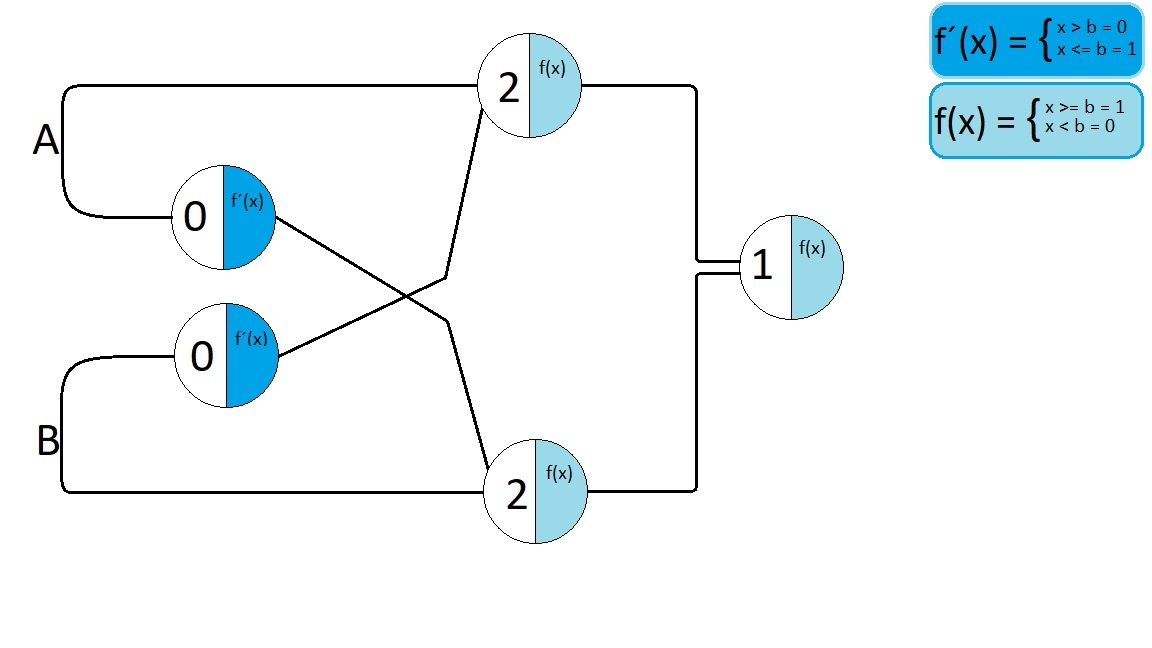